In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [4]:
data = pd.read_csv("complaints.csv")

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
data.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-05-10,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,NY,11746.0,NaN,NaN,Referral,2022-05-11,Closed with explanation,Yes,NaN,5552549
1,2022-05-05,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",WV,25504.0,NaN,NaN,Web,2022-05-05,In progress,Yes,NaN,5546454
2,2022-05-05,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,32792.0,NaN,Consent not provided,Web,2022-05-05,Closed with explanation,Yes,NaN,5543106
3,2022-04-19,Credit card or prepaid card,General-purpose credit card or charge card,"Advertising and marketing, including promotion...",Didn't receive advertised or promotional terms,NaN,NaN,"Bread Financial Holdings, Inc.",FL,34787.0,NaN,NaN,Web,2022-05-05,Closed with monetary relief,Yes,NaN,5464187
4,2022-05-05,Debt collection,Auto debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,NaN,NaN,NCB Management Services Inc.,TX,78503.0,NaN,NaN,Web,2022-05-05,Closed with explanation,Yes,NaN,5544809


In [12]:
data_with_complaints = data.dropna(subset=["Consumer complaint narrative"])

In [13]:
mortgage_data = data_with_complaints[data_with_complaints.Product == "Mortgage"]

In [14]:
mortgage_data.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
147,2022-03-04,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,I can prove that XXXX XXXX lied about my inten...,NaN,Rhode Island Housing and Mortgage Finance Corp...,RI,2904.0,NaN,Consent provided,Web,2022-03-04,Closed with explanation,Yes,NaN,5288570
194,2022-02-15,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,Bank of America did not make the County proper...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",PA,19365.0,Servicemember,Consent provided,Web,2022-02-15,Closed with non-monetary relief,Yes,NaN,5226173
275,2022-02-23,Mortgage,Home equity loan or line of credit (HELOC),Struggling to pay mortgage,NaN,I have an equity-line-of -credit with M & T ba...,Company has responded to the consumer and the ...,M&T BANK CORPORATION,MD,20854.0,"Older American, Servicemember",Consent provided,Web,2022-02-23,Closed with explanation,Yes,NaN,5253713
296,2022-03-19,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,"On XX/XX/2022, I made a regular monthly paymen...",NaN,NATIONSTAR MORTGAGE,CA,92057.0,NaN,Consent provided,Web,2022-03-19,Closed with explanation,Yes,NaN,5341101
311,2022-02-06,Mortgage,Other type of mortgage,Trouble during payment process,NaN,Suntrust is saying I didnt make any mortgage p...,Company has responded to the consumer and the ...,TRUIST FINANCIAL CORPORATION,GA,30253.0,NaN,Consent provided,Web,2022-03-03,Closed with explanation,Yes,NaN,5191311


In [11]:
mortgage_data.describe()

,Complaint ID
count,3.542210e+05
mean,1.962904e+06
std,1.452296e+06
min,5.000000e+00
25%,6.488980e+05
50%,1.760237e+06
75%,3.036130e+06
max,5.584703e+06


In [15]:
lenders_count = mortgage_data['Company'].value_counts()
print(lenders_count)

WELLS FARGO & COMPANY                          7904
NATIONSTAR MORTGAGE                            6742
Ocwen Financial Corporation                    6426
BANK OF AMERICA, NATIONAL ASSOCIATION          4988
Ditech Financial LLC                           3619
                                               ... 
Credit Card Receivables Fund Incorporated         1
Developers Mortgage Co.                           1
ACE LENDING GROUP, LLC                            1
Minnesota Home Financial, LLC                     1
Fidelity First Real Estate and Mortgage Inc       1
Name: Company, Length: 1385, dtype: int64


In [18]:
lenders_count.head(20)

WELLS FARGO & COMPANY                                                            7904
NATIONSTAR MORTGAGE                                                              6742
Ocwen Financial Corporation                                                      6426
BANK OF AMERICA, NATIONAL ASSOCIATION                                            4988
Ditech Financial LLC                                                             3619
JPMORGAN CHASE & CO.                                                             3580
SELECT PORTFOLIO SERVICING, INC.                                                 3275
Shellpoint Partners, LLC                                                         3213
LoanCare, LLC                                                                    2676
Specialized Loan Servicing Holdings LLC                                          2564
Freedom Mortgage Company                                                         2408
Rocket Mortgage, LLC                                  

In [19]:
N = 8
top_lenders_count = lenders_count.iloc[:N].append(pd.Series(lenders_count.iloc[N:].sum(), index=['OTHER']))
print (top_lenders_count)

WELLS FARGO & COMPANY                     7904
NATIONSTAR MORTGAGE                       6742
Ocwen Financial Corporation               6426
BANK OF AMERICA, NATIONAL ASSOCIATION     4988
Ditech Financial LLC                      3619
JPMORGAN CHASE & CO.                      3580
SELECT PORTFOLIO SERVICING, INC.          3275
Shellpoint Partners, LLC                  3213
OTHER                                    52027
dtype: int64


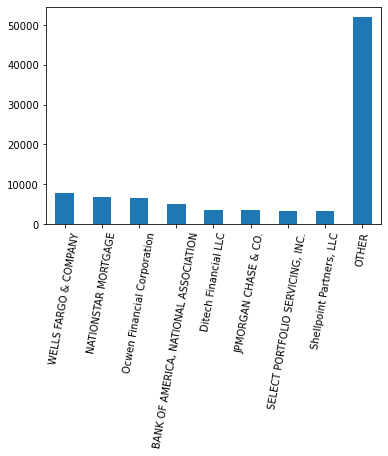

In [27]:
ax = top_lenders_count.plot.bar(rot=80)

In [28]:
complaint_issues_count = mortgage_data['Issue'].value_counts()
print(complaint_issues_count)


Trouble during payment process                                                      27634
Loan servicing, payments, escrow account                                            14722
Struggling to pay mortgage                                                          14219
Loan modification,collection,foreclosure                                            10789
Applying for a mortgage or refinancing an existing mortgage                          8902
Closing on a mortgage                                                                6278
Application, originator, mortgage broker                                             3746
Settlement process and costs                                                         2250
Credit decision / Underwriting                                                       1289
Incorrect information on your report                                                 1187
Problem with a credit reporting company's investigation into an existing problem      528
Improper u

In [29]:
N = 7
top_issues_count = complaint_issues_count.iloc[:N].append(pd.Series(complaint_issues_count.iloc[N:].sum(), index=['OTHER']))
print (top_issues_count)

Trouble during payment process                                 27634
Loan servicing, payments, escrow account                       14722
Struggling to pay mortgage                                     14219
Loan modification,collection,foreclosure                       10789
Applying for a mortgage or refinancing an existing mortgage     8902
Closing on a mortgage                                           6278
Application, originator, mortgage broker                        3746
OTHER                                                           5484
dtype: int64


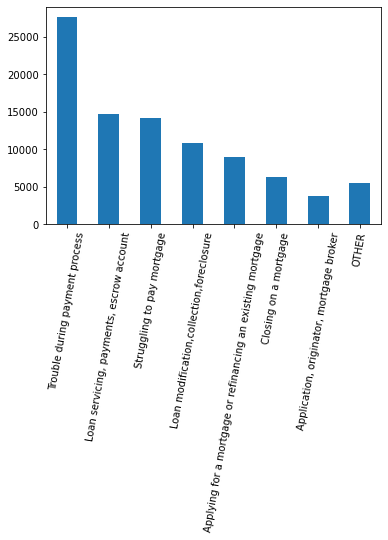

In [30]:
ax = top_issues_count.plot.bar(rot=80)

In [31]:
duplicate_text = mortgage_data[mortgage_data.duplicated(['Consumer complaint narrative'])]


In [32]:
duplicate_text

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
46989,2022-03-24,Mortgage,Conventional home mortgage,Problem with a credit reporting company's inve...,NaN,"Upon reviewing of my records, the following ac...",Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,94601.0,NaN,Consent provided,Web,2022-03-24,Closed with explanation,Yes,NaN,5364484
204140,2019-03-01,Mortgage,FHA mortgage,Struggling to pay mortgage,NaN,FHA CASE # XXXX A modification was approved on...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,IN,46385.0,NaN,Consent provided,Web,2019-03-01,Closed with explanation,Yes,NaN,3166265
330906,2020-01-16,Mortgage,FHA mortgage,Problem with a credit reporting company's inve...,NaN,This particular account situation that is late...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",FL,33073,NaN,Consent provided,Web,2020-01-21,Closed with explanation,Yes,NaN,3499624
339407,2020-01-27,Mortgage,FHA mortgage,Problem with a credit reporting company's inve...,NaN,This particular account situation that is late...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,NC,28214,NaN,Consent provided,Web,2020-01-30,Closed with explanation,Yes,NaN,3510199
414110,2018-02-22,Mortgage,FHA mortgage,Incorrect information on your report,NaN,We applied for a modification which took over ...,NaN,"EQUIFAX, INC.",TX,75103.0,NaN,Consent provided,Web,2018-02-22,Closed with explanation,Yes,NaN,2822567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628146,2017-09-28,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,The lender has failed to respond to our QWR an...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,MO,65802,NaN,Consent provided,Web,2017-09-28,Closed with explanation,Yes,NaN,2687044
2628259,2017-09-29,Mortgage,FHA mortgage,Struggling to pay mortgage,NaN,I 'm writting a complaint againts Bank of Amer...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",WA,98387,NaN,Consent provided,Web,2017-10-04,Closed with explanation,Yes,NaN,2688698
2629121,2017-11-01,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,The lender has failed to respond to our QWR an...,NaN,"Caliber Home Loans, Inc.",LA,70058,NaN,Consent provided,Web,2017-11-01,Closed with explanation,Yes,NaN,2717938
2652481,2016-03-16,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,By failing to adhere to both California law an...,NaN,"CARRINGTON MORTGAGE SERVICES, LLC",CA,95407,NaN,Consent provided,Web,2016-03-16,Closed with explanation,Yes,No,1834682


In [35]:
#it seems that there are duplicates in the texts, but they are actual distinct complaints, 
#filled to different companies. Perhaps there are standard complaint texts and they just copied them
#while filling the complaints

In [36]:
mortgage_data.to_csv('mortgage_complaints.csv', index = False)
